# Analysis of the CHF Dataset

## Introduction

For an analysis done as part of his PhD thesis, John Mbotwa reduced the this dataset to PatientID with six covariates: 'Diabetes', 'StatusDeath', 'TimeDeath', 'ClinicDeath', 'Haemoglobin','Sex'. The full dataset was presented in an '*sav* file called 'MG HF cohorts 1 to 3 May 2016 censored.sav', here renamed to 'MG.sav' because of the white space in the title.


## Data preparation

The first common sense check is see whether all covariates in John's 'FinalData' spreadsheet are present and whether the units makes sense. This is a ten year study and the time units report in the 'FinalData' spreadsheet seem days since start of study. 

In [2]:
import pandas as pd
df=pd.read_spss('MG.sav')     
df.head()

,PatientID,Cohort,MaleSex,Diabetes,Stroke,COPD,SHFIsch,SHFValvular,SHFHyper,SHFDCM,...,Statin,Warfarin,NYHADelta,NYHAworsening,NYHAimproving,eGFRDelta,LVEDDDelta,LVESDDelta,LVESDremodel,EFDelta
0,3.0,1.0,Male,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,1.0,Female,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.449162,1.0,-2.0,95.652174,0.0
2,6.0,1.0,Male,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.386593,-2.0,-2.0,97.014925,2.0
3,7.0,1.0,Male,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,-4.662848,-8.0,-6.0,90.476190,0.0
4,9.0,1.0,Male,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PatientId and Number of Entries
The 'FinalData' spreadsheet lists 1802 rows, disregarding the data description line, with the PatientId ranging from 3 to 2540. The overall number of entries appears correct, but, annoyingly, the data seems to represented mainly as floats.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 88 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PatientID             1802 non-null   float64 
 1   Cohort                1802 non-null   float64 
 2   MaleSex               1802 non-null   category
 3   Diabetes              1802 non-null   float64 
 4   Stroke                1091 non-null   float64 
 5   COPD                  1802 non-null   float64 
 6   SHFIsch               1802 non-null   float64 
 7   SHFValvular           1091 non-null   float64 
 8   SHFHyper              1091 non-null   float64 
 9   SHFDCM                1091 non-null   float64 
 10  PPMorICD              1802 non-null   float64 
 11  ICD                   1802 non-null   float64 
 12  CRT                   1802 non-null   float64 
 13  ClinicDate            1802 non-null   object  
 14  DeathDate             1295 non-null   float64 
 15  Cens

### PatientID
PatientID contains entries consistent with 'FinalData' spreadsheet.


In [4]:
df['PatientID']

0          3.0
1          5.0
2          6.0
3          7.0
4          9.0
         ...  
1797    2532.0
1798    2533.0
1799    2534.0
1800    2535.0
1801    2540.0
Name: PatientID, Length: 1802, dtype: float64

### Diabetes

The first subject with Diabetes has PatientID 18. The floats can be converted to ints without problem. Again, this appears to match the 'FinalData' spreadsheet.

In [5]:
### Diabetes
df['PatientID'][12]

18.0

In [6]:
df['Diabetes'][12]

1.0

In [7]:
df['Diabetes']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1797    0.0
1798    1.0
1799    0.0
1800    0.0
1801    0.0
Name: Diabetes, Length: 1802, dtype: float64

### TimeDeath

'TimeDeath' matches the spreadsheet as well. Apparently, time of death in days since start of study. There are no missing values

In [8]:
df['TimeDeath']
df['TimeDeath'].isna().sum()

0

### StatusDeath
Again, good agreement with the 'FinalData' spreadsheet.

In [9]:
df['StatusDeath']

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1797    0.0
1798    0.0
1799    0.0
1800    0.0
1801    0.0
Name: StatusDeath, Length: 1802, dtype: float64

And no missing values.

In [10]:
df['StatusDeath'].isna().sum()

0

Let's show the time of death for patients whose status is not 1.0

(array([253., 165.,  87., 109., 152.,   6.,  72., 145.,  67.,   9.]),
 array([ 652. ,  963.9, 1275.8, 1587.7, 1899.6, 2211.5, 2523.4, 2835.3,
        3147.2, 3459.1, 3771. ]),
 <BarContainer object of 10 artists>)

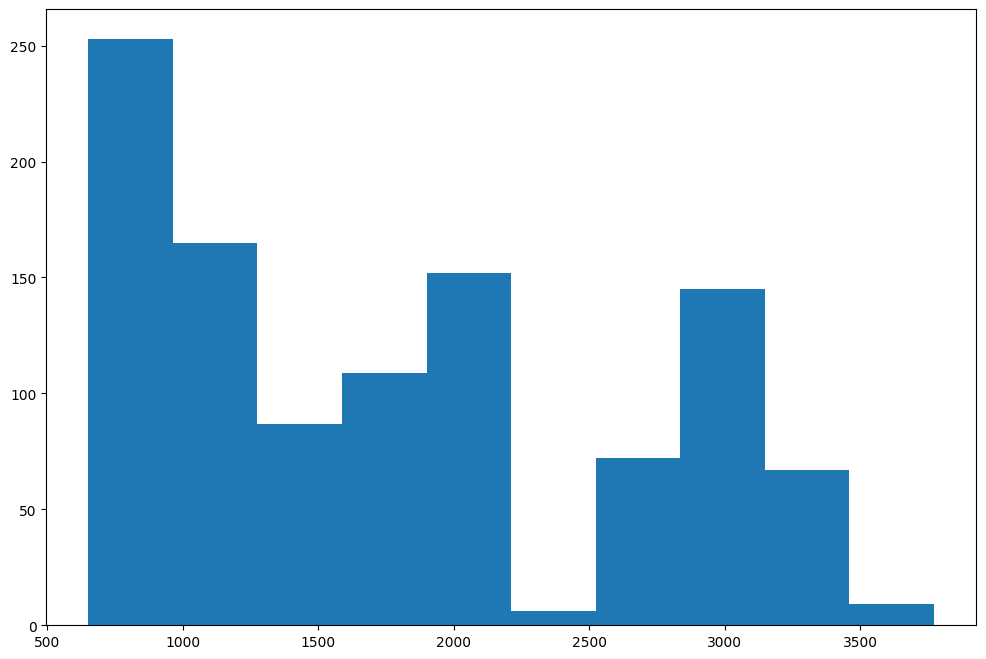

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

timedeath=df['TimeDeath']
timedeath[df['StatusDeath'] < 1.]
fig=plt.figure()
axes=fig.add_subplot(1,1,1)
axes.hist(timedeath[df['StatusDeath']<1.])

(array([161., 141., 137.,  96.,  64.,  43.,  34.,  33.,  22.,   6.]),
 array([2.0000e+00, 3.3770e+02, 6.7340e+02, 1.0091e+03, 1.3448e+03,
        1.6805e+03, 2.0162e+03, 2.3519e+03, 2.6876e+03, 3.0233e+03,
        3.3590e+03]),
 <BarContainer object of 10 artists>)

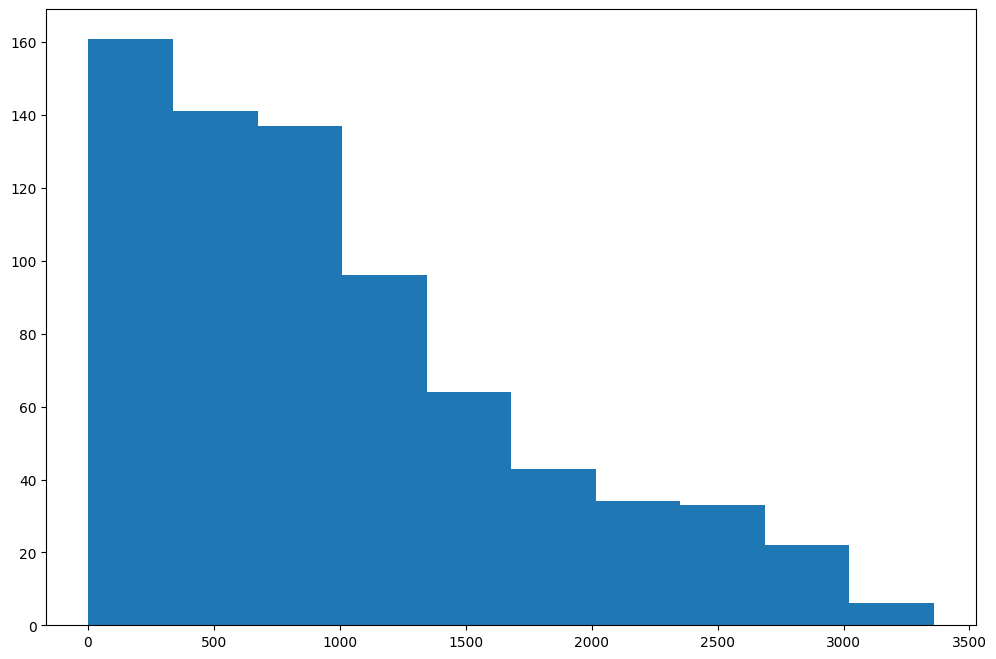

In [12]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)
axes.hist(timedeath[df['StatusDeath']>0.])

This is as expected. If someone truly died, they are very unlikely to live all the way up to 3650  days. It would be good to check if 'TimeDeath' corresponds to the end of study date for subjects entering the study after the starting date.

Text(0.5, 0, 'time $t$')

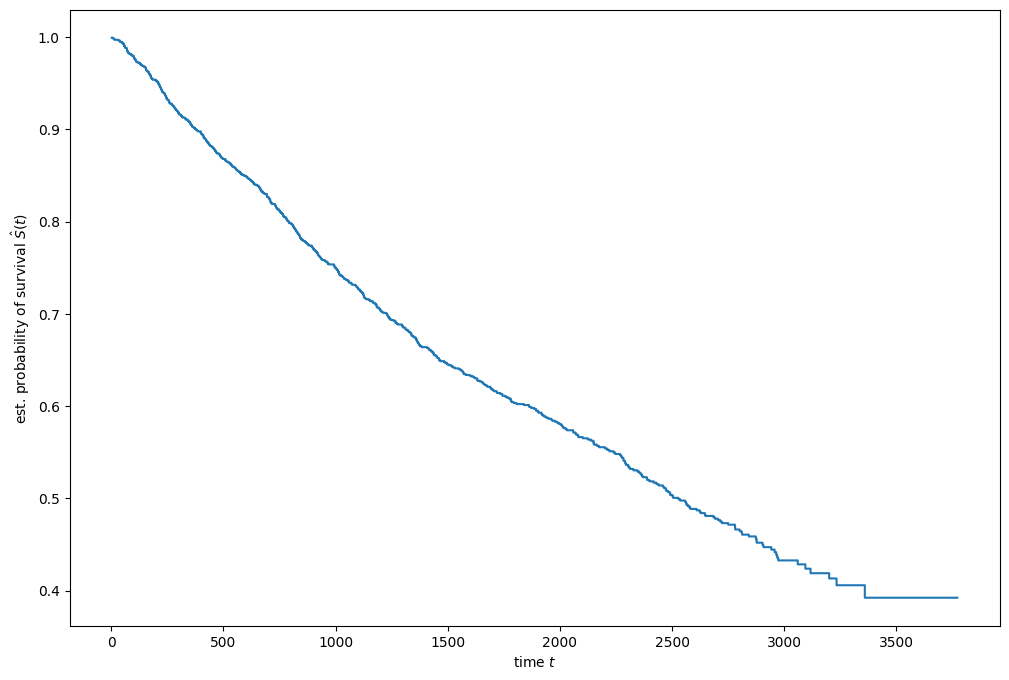

In [13]:
from sksurv.nonparametric import kaplan_meier_estimator
statusdeath = [ x > 0.  for x in df["StatusDeath"] ]
time, survival_prob = kaplan_meier_estimator(statusdeath, df["TimeDeath"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

Let's bring the event data into the stuctured array that sksurv expects. The structure type is taken
from sksurv.datasets: 

import load_veterans_lung_cancer

In [14]:
import numpy as np

events = [ True if x > 0. else False for x in df['StatusDeath']]
times  = [ x for x in df['TimeDeath'] ]

data_y=np.array(list(zip(events,times)), dtype=[('Status', '?'), ('Survival_in_days', '<f8')])
print(data_y)

[( True, 1961.) ( True, 2842.) ( True,  749.) ... (False,  652.)
 (False,  652.) (False,  760.)]


In [15]:
print(df['ClinicAge'].isna().sum())
print(df['Haemoglobin'].isna().sum())

0
6


Oopers! Haemoglobin has missing values. For now imput with mean.

In [16]:
data_x_withnan=df[['ClinicAge','Haemoglobin']]
data_x_numeric=data_x_withnan.fillna(data_x_withnan.mean())
print(data_x_numeric)
print(data_x_numeric.shape)

      ClinicAge  Haemoglobin
0          75.0         15.5
1          72.0         13.8
2          70.0         13.4
3          55.0         16.6
4          68.0         15.3
...         ...          ...
1797       83.0         13.7
1798       51.0         13.6
1799       72.0         15.7
1800       65.0         13.7
1801       87.0         12.6

[1802 rows x 2 columns]
(1802, 2)


In [17]:
print(data_x_numeric['ClinicAge'].isna().sum())
print(data_x_numeric['Haemoglobin'].isna().sum())

0
0


In [18]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

CoxPHSurvivalAnalysis()

In [19]:
estimator.score(data_x_numeric, data_y)

0.666426027639768

OK, let's add 'Diabetes' and see if this improves the score. No problem with missing values:

In [20]:
print(df['Diabetes'].isna().sum())

0


In [21]:
data_x_withnan3=df[['ClinicAge','Haemoglobin','Diabetes']]
data_x_numeric3=data_x_withnan3.fillna(data_x_withnan3.mean())
estimator3 = CoxPHSurvivalAnalysis()
estimator3.fit(data_x_numeric3, data_y)
estimator3.score(data_x_numeric3, data_y)

0.670451749959191

Now let's add gender.

In [22]:
data_x_withnan4=df[['ClinicAge','Haemoglobin','Diabetes','MaleSex']]
data_x_numeric4=data_x_withnan4.fillna(data_x_withnan4.mean())
print(data_x_withnan4)

      ClinicAge  Haemoglobin  Diabetes MaleSex
0          75.0         15.5       0.0    Male
1          72.0         13.8       0.0  Female
2          70.0         13.4       0.0    Male
3          55.0         16.6       0.0    Male
4          68.0         15.3       0.0    Male
...         ...          ...       ...     ...
1797       83.0         13.7       0.0    Male
1798       51.0         13.6       1.0    Male
1799       72.0         15.7       0.0    Male
1800       65.0         13.7       0.0    Male
1801       87.0         12.6       0.0    Male

[1802 rows x 4 columns]


C:\Users\omarc\AppData\Local\Temp\ipykernel_32440\3793708642.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_x_numeric4=data_x_withnan4.fillna(data_x_withnan4.mean())


The OneHotEncoder converts categorical data into numerical ones.

In [23]:
from sksurv.preprocessing import OneHotEncoder

data_x_numeric4oh = OneHotEncoder().fit_transform(data_x_numeric4)
data_x_numeric4oh.head()

c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\sksurv\column.py:142: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, series in table.iteritems():


,ClinicAge,Haemoglobin,Diabetes,MaleSex=Male
0,75.0,15.5,0.0,1.0
1,72.0,13.8,0.0,0.0
2,70.0,13.4,0.0,1.0
3,55.0,16.6,0.0,1.0
4,68.0,15.3,0.0,1.0


In [24]:
estimator4 = CoxPHSurvivalAnalysis()
estimator4.fit(data_x_numeric4oh, data_y)
estimator4.score(data_x_numeric4oh, data_y)

0.679573425174674

Out of interest, what are the coefficients?

In [25]:
print(estimator4.coef_)

[ 0.04359563 -0.19889853  0.30170977  0.56861131]


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
from sksurv.linear_model import CoxnetSurvivalAnalysis
estimatorlasso = CoxnetSurvivalAnalysis(l1_ratio=0.99, fit_baseline_model=True)
estimatorlasso.fit(data_x_numeric4oh, data_y)
estimatorlasso.score(data_x_numeric4oh, data_y)

0.6795952666150136

In [28]:
from sksurv.svm import FastSurvivalSVM

estimatorsvm = FastSurvivalSVM(max_iter=1000, optimizer="rbtree", tol=1e-5, random_state=0)
estimatorsvm.fit(data_x_numeric4oh, data_y)
estimatorsvm.score(data_x_numeric4oh, data_y)

0.679901046779767

### Preliminary Conclusion
SVM, Cox proportional hazards and CPH with Lasso all seem to give similar results. We still have to do cross validation.

## Implementation of the partial likelihood as a loss function

This is dual purpose. We can do a standard Cox PH regresssion and see if we agree on the result, but as a loss function it is also the output layer of Cox-NNet, so if it works, it shouldn't be hard to implement that network.

The log partial likelihood id given by:
$$
\ln L_{\boldsymbol{\beta}} = \sum^N_{i=1} c_i( \theta_i - \ln \sum_{j \in R(t_j)} \exp \theta_j)
$$

When we allow for tied events, the procedure needs to be adapted. There are two main approaches, one by Breslow and one by Efron. Most survival analysis packages include at least these two methods. We will implement the Breslow one to ensure we understand the procedure, but will sksurv's implementation in the loss function. 

If $s_j=\sum_{i  \in D_j} \boldsymbol{x}_i$ is the sum of covariates over the set $D_j$ of individuals who die at time $t_j$, then
$$
L_{\boldsymbol{\beta}} = \frac{\Pi^J_{j=1} \exp \boldsymbol{\beta} \boldsymbol{s}_j}{ \left\{ \sum_{k \in R_j} \exp \boldsymbol{\beta} \boldsymbol{x}_k   \right\}^{d_j}}
$$

If we look at the file *coxph.py* we see that **CoxPHOptimizer** implements this likelihood.

### Have we done this correctly?

An independent check on the numbers would be handy. John Fox introductory course on survival analysis, https://socialsciences.mcmaster.ca/jfox/Courses/soc761/survival-analysis.pdf, provides a numerical example. The advantage of that example is that we get to see which coefficient belongs to what covariate.

In [29]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi = load_rossi()

cph = CoxPHFitter().fit(rossi, 'week', 'arrest')

cph.print_summary(columns=["coef", "se(coef)", "p"])

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-03-20 21:45:10 UTC

---
            coef   se(coef)      p
covariate                         
fin        -0.38       0.19   0.05
age        -0.06       0.02   0.01
race        0.31       0.31   0.31
wexp       -0.15       0.21   0.48
mar        -0.43       0.38   0.26
paro       -0.08       0.20   0.66
prio        0.09       0.03 <0.005
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

OK, that was a bit quick. What happened here? **Lifelines** is another survival package. It was just one line to do CoxPH fit and the coefficients are almost identical to the example given by Fox (slide 76).

At the very least, we should redo the analysis with sksurv. *rossi* is a dataframe that is understood by Pandas.

In [30]:
print(rossi)

     week  arrest  fin  age  race  wexp  mar  paro  prio
0      20       1    0   27     1     0    0     1     3
1      17       1    0   18     1     0    0     1     8
2      25       1    0   19     0     1    0     1    13
3      52       0    1   23     1     1    1     1     1
4      52       0    0   19     0     1    0     1     3
..    ...     ...  ...  ...   ...   ...  ...   ...   ...
427    52       0    1   31     0     1    0     1     3
428    52       0    0   20     1     0    0     1     1
429    52       0    1   20     1     1    1     1     1
430    52       0    0   29     1     1    0     1     3
431    52       0    1   24     1     1    0     1     1

[432 rows x 9 columns]


So arrest is the censor variable and week is the timing of the event. We prepare the list of event tuples as above.

In [31]:
events = [ True if x > 0. else False for x in rossi['arrest']]
times  = [ x for x in rossi['week'] ]

data_y_rossi=np.array(list(zip(events,times)), dtype=[('Status', '?'), ('Survival_in_weeks', '<f8')])

In [32]:
data_x_rossi=rossi[['fin','age','race','wexp','mar','paro','prio']]
print(data_x_rossi)

     fin  age  race  wexp  mar  paro  prio
0      0   27     1     0    0     1     3
1      0   18     1     0    0     1     8
2      0   19     0     1    0     1    13
3      1   23     1     1    1     1     1
4      0   19     0     1    0     1     3
..   ...  ...   ...   ...  ...   ...   ...
427    1   31     0     1    0     1     3
428    0   20     1     0    0     1     1
429    1   20     1     1    1     1     1
430    0   29     1     1    0     1     3
431    1   24     1     1    0     1     1

[432 rows x 7 columns]


In [33]:
estimatorrossi = CoxPHSurvivalAnalysis()
estimatorrossi.fit(data_x_rossi, data_y_rossi)
score=estimatorrossi.score(data_x_rossi, data_y_rossi)
print('score is: ',score)
print('coefficients: ',estimatorrossi.coef_)

score is:  0.6404231835047672
coefficients:  [-0.37902189 -0.05724593  0.31412977 -0.1511146  -0.43278257 -0.08498284
  0.09111154]


Again, very similar results to Fox's table and importantly, the order of the coefficients is given by the order
of the covariates.

Now let's go back for to the CHF data for a bit and see whether the lifelines analysis produces the same coefficients. 

In [34]:
data_chf=df[['StatusDeath', 'TimeDeath','ClinicAge','Haemoglobin','Diabetes','MaleSex']]
data_chf_imputed=data_chf.fillna(data_chf.mean())
data_chf_numeric = OneHotEncoder().fit_transform(data_chf_imputed)
data_chf_numeric.head()

C:\Users\omarc\AppData\Local\Temp\ipykernel_32440\3938151820.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_chf_imputed=data_chf.fillna(data_chf.mean())
c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\sksurv\column.py:142: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, series in table.iteritems():


,StatusDeath,TimeDeath,ClinicAge,Haemoglobin,Diabetes,MaleSex=Male
0,1.0,1961.0,75.0,15.5,0.0,1.0
1,1.0,2842.0,72.0,13.8,0.0,0.0
2,1.0,749.0,70.0,13.4,0.0,1.0
3,0.0,3378.0,55.0,16.6,0.0,1.0
4,1.0,3233.0,68.0,15.3,0.0,1.0


In [35]:
cphchf = CoxPHFitter().fit(data_chf_numeric, 'TimeDeath', 'StatusDeath')
cphchf.print_summary(columns=["coef", "se(coef)", "p"])

<lifelines.CoxPHFitter: fitted with 1802 total observations, 1065 right-censored observations>
             duration col = 'TimeDeath'
                event col = 'StatusDeath'
      baseline estimation = breslow
   number of observations = 1802
number of events observed = 737
   partial log-likelihood = -4949.39
         time fit was run = 2023-03-20 21:45:10 UTC

---
               coef   se(coef)      p
covariate                            
ClinicAge      0.04       0.00 <0.005
Haemoglobin   -0.20       0.02 <0.005
Diabetes       0.30       0.08 <0.005
MaleSex=Male   0.57       0.09 <0.005
---
Concordance = 0.68
Partial AIC = 9906.77
log-likelihood ratio test = 329.17 on 4 df
-log2(p) of ll-ratio test = 230.07

They are almost the same coefficients, and in the same order.

## Neural Network Implementation of Partial Regression

OK, we have a free floating loss function, as yet not really tested. It's not even a loss function as such, more a methodology. Let's tidy up.

In [48]:
import torch.nn
from coxphoptimizer import CoxPHOptimizer

torch.autograd.set_detect_anomaly=True

class CoxNNet(torch.nn.Module):
    
    def __init__(self,df,censorvariablename,survivaltimevariablename,coefficients=None):
        
        super().__init__()
                  
        self.covariates=[x for x in df.columns if x != censorvariablename and x != survivaltimevariablename]
        self.df  = df
        self.dfx = df[self.covariates].to_numpy(dtype=float)

        if coefficients == None:
            n_covariates = len(self.covariates)
            self.coefficients = torch.randn(n_covariates,requires_grad=True,dtype=torch.float)
        else:
            self.coefficients = coefficients
        print(self.coefficients)
        alphas = torch.zeros(self.dfx.shape[1]) # this line is used in coxpy to initialize the alphas
        self.opt=CoxPHOptimizer(self.dfx, self.df[censorvariablename].to_numpy(),\
                           self.df[survivaltimevariablename].to_numpy(), \
                           alphas,'breslow')
        
              
    def forward(self):
        # sksurv calculates the llh /event and puts a minus sign in front, we undo that
        total = -self.df.shape[0]*self.opt.nlog_likelihood(self.coefficients)   
        return total

c=torch.tensor([-0.38,-0.06,0.31,-0.15,-0.43,-0.08,0.09])    
net=CoxNNet(rossi,'arrest','week',coefficients=c)
net.forward()

tensor([-0.3800, -0.0600,  0.3100, -0.1500, -0.4300, -0.0800,  0.0900])


tensor(-659.1310)

In [49]:
# Compare to a direct call
alphas = np.zeros(data_x_rossi.shape[1], dtype=np.float_) # this line is used in coxpy to initialize the alphas
opt=CoxPHOptimizer(data_x_rossi.to_numpy(), rossi['arrest'].to_numpy(),rossi['week'].to_numpy(), alphas,'breslow')
print(opt.nlog_likelihood(c.detach().cpu().numpy()))
print('Comparable log partial llh estimate:')
print(-data_x_rossi.shape[0]*opt.nlog_likelihood(c.detach().cpu().numpy()))

tensor(1.5258)
Comparable log partial llh estimate:
tensor(-659.1310)


This is nearly identical to **lifelines** estimate.

### Implementing gradient descent and determining the maximum log partial likelihood.

In [50]:
net=CoxNNet(rossi,'arrest','week')
loss = net.forward()
print(loss)
lr=0.0001
loss.backward()
n_epoch = 4000
for i in range(n_epoch):
    loss=net.forward()
    loss.backward()
    with torch.no_grad():
        net.coefficients += net.coefficients.grad * lr        
        net.coefficients.grad.zero_()

loss=net.forward()
print(loss)
print(net.coefficients)

tensor([ 0.0879, -0.5921, -1.4016,  0.3693, -0.3180,  0.1702,  0.3527],
       requires_grad=True)
tensor(-886.6629, grad_fn=<MulBackward0>)
tensor(-659.1223, grad_fn=<MulBackward0>)
tensor([-0.3782, -0.0571,  0.2983, -0.1505, -0.4441, -0.0840,  0.0911],
       requires_grad=True)


Since the values found by CoxNNet for the coefficients appear close to the lifelines results, it appears we have successfully used *pytorch* to calculate a gradient for the loss function and perform steepest gradient descent. This means we can start building neural networks with it.

## C-statistics

## Visualisation of the dataset

In [51]:
dfvis=OneHotEncoder().fit_transform(df[['ClinicAge','Haemoglobin','TimeDeath','StatusDeath','MaleSex']])
visdata=dfvis.to_numpy().T
print(visdata[4])

[1. 0. 1. ... 1. 1. 1.]


c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\sksurv\column.py:142: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, series in table.iteritems():


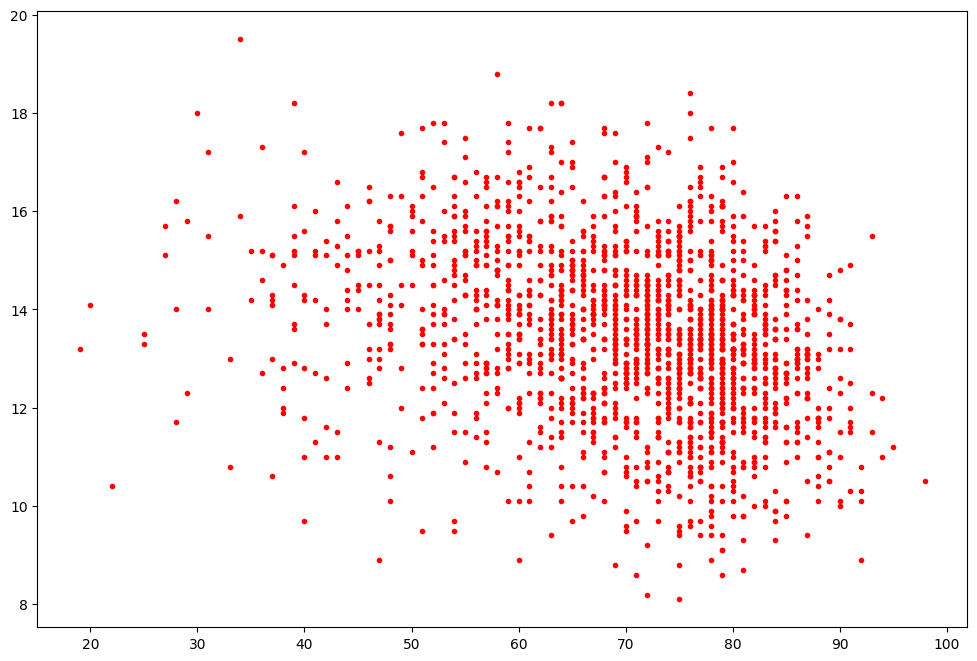

In [52]:
plt.plot(visdata[0],visdata[1],'r.')

In [53]:
lifem  = np.array([ [x,y,t,g] for x,y,t,z,g in zip(visdata[0],visdata[1],visdata[2],visdata[3],visdata[4]) if z > 0 and g > 0]).T
deathm = np.array([ [x,y,t,g] for x,y,t,z,g in zip(visdata[0],visdata[1],visdata[2],visdata[3],visdata[4]) if z < 1 and g > 0]).T

lifef  = np.array([ [x,y,t,g] for x,y,t,z,g in zip(visdata[0],visdata[1],visdata[2],visdata[3],visdata[4]) if z > 0 and g < 1]).T
deathf = np.array([ [x,y,t,g] for x,y,t,z,g in zip(visdata[0],visdata[1],visdata[2],visdata[3],visdata[4]) if z < 1 and g < 1]).T

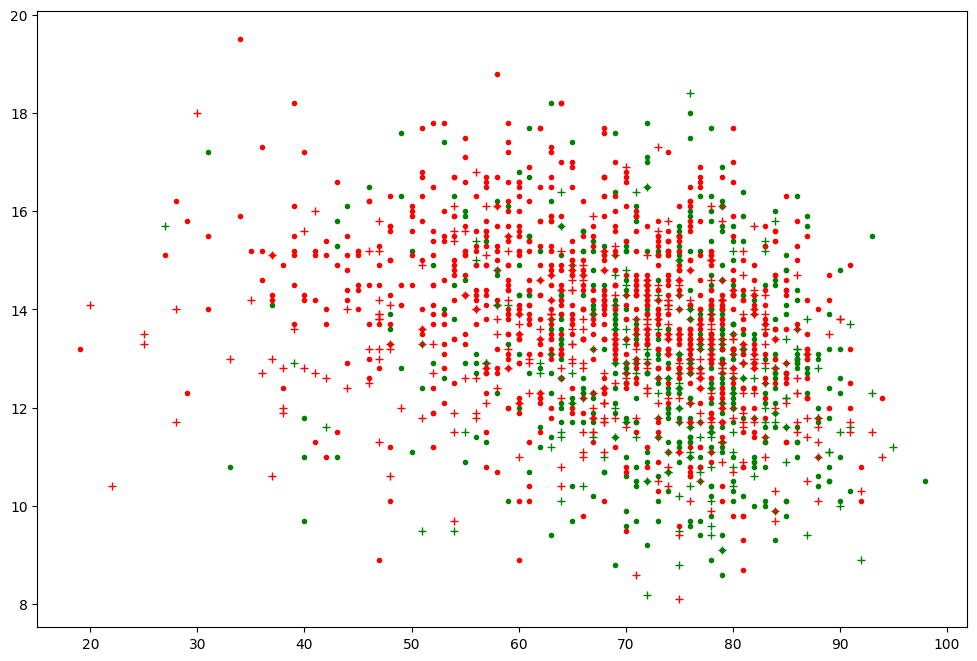

In [54]:
plt.plot(lifem[0],  lifem[1],  'g.')
plt.plot(deathm[0], deathm[1], 'r.')

plt.plot(lifef[0],  lifef[1],  'g+')
plt.plot(deathf[0], deathf[1], 'r+')

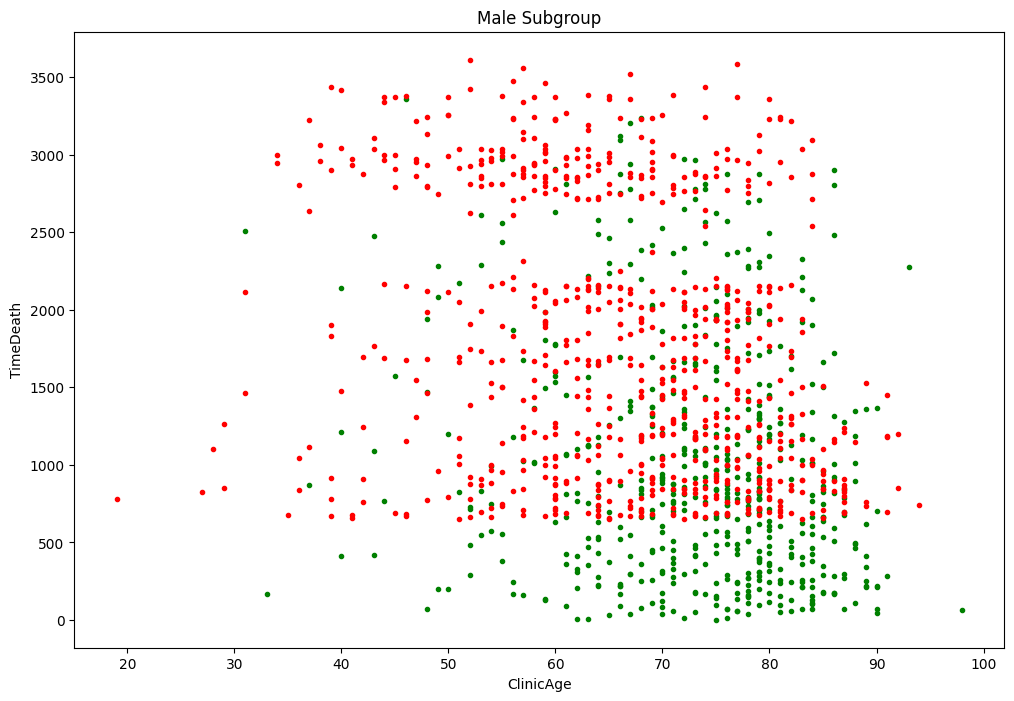

In [55]:
plt.plot(lifem[0],  lifem[2],  'g.',label='censored')
plt.plot(deathm[0], deathm[2], 'r.',label='died')
plt.title('Male Subgroup')
plt.xlabel('ClinicAge')
plt.ylabel('TimeDeath')
plt.savefig('male.png')

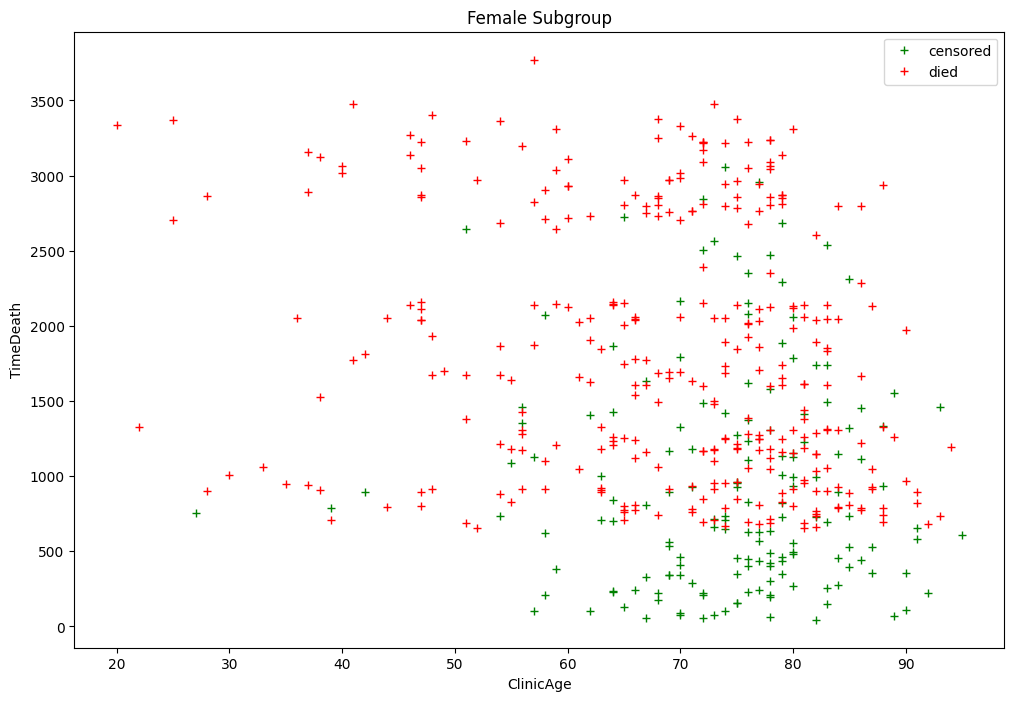

In [56]:
plt.title('Female Subgroup')
plt.plot(lifef[0],  lifef[2],  'g+',label='censored')
plt.plot(deathf[0], deathf[2], 'r+',label='died')
plt.xlabel('ClinicAge')
plt.ylabel('TimeDeath')
plt.legend()
plt.savefig('female.png')

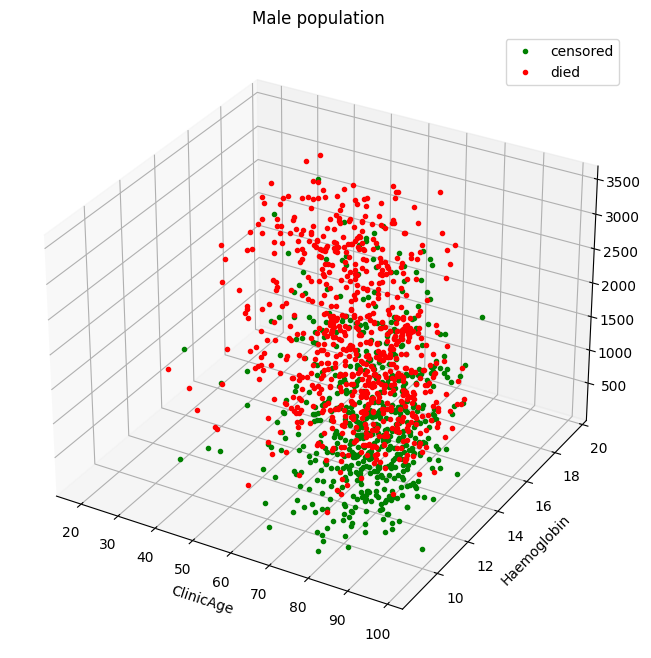

In [57]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.title('Male population')
plt.plot(lifem[0],  lifem[1],  lifem[2],   'g.',label='censored')
plt.plot(deathm[0], deathm[1], deathm[2], 'r.', label='died')
plt.xlabel('ClinicAge')
plt.ylabel('Haemoglobin')
#plt.zlabel('TimeDeath')
plt.legend()
plt.savefig('male3D.png')

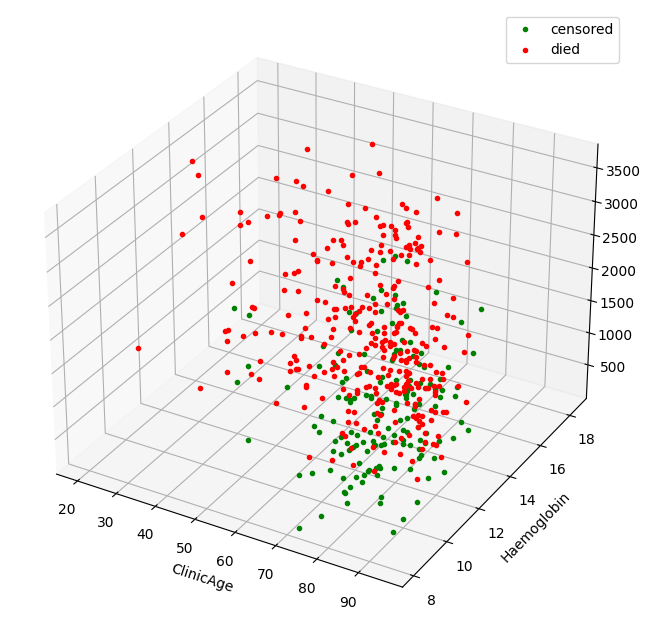

In [58]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.plot(lifef[0],  lifef[1],  lifef[2],   'g.',label='censored')
plt.plot(deathf[0], deathf[1], deathf[2], 'r.',label='died')
plt.xlabel('ClinicAge')
plt.ylabel('Haemoglobin')
# plt.zlabel('TimeDeath')
plt.legend()

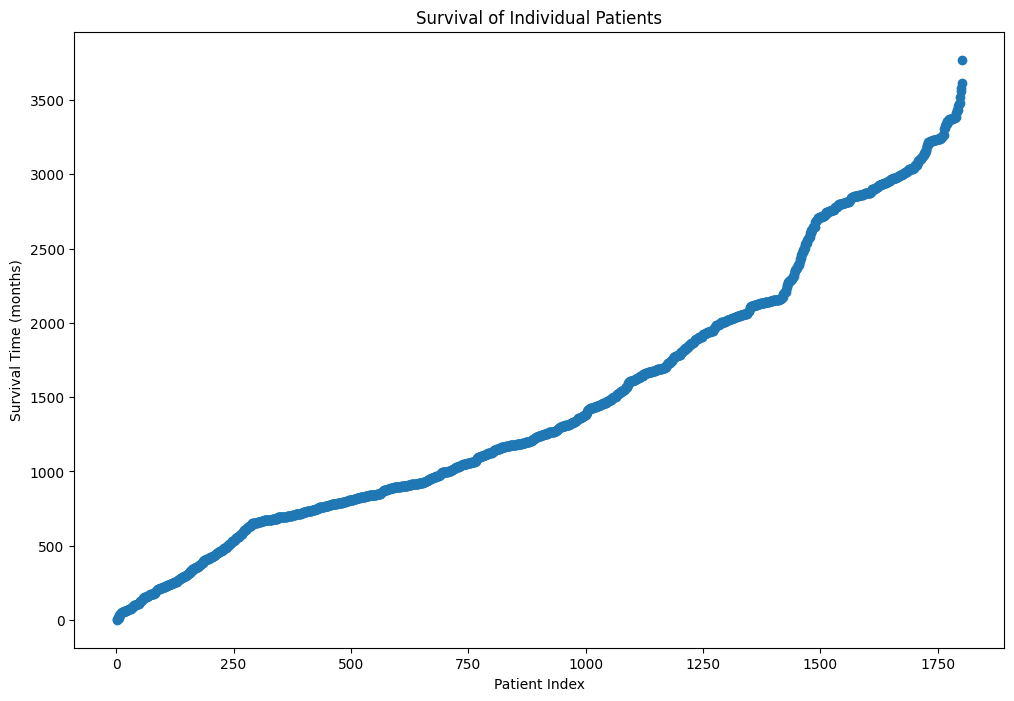

In [66]:
# Sort patients by death date ascending
df_sorted = df.sort_values(by=['TimeDeath'])

plt.scatter(range(1, len(df_sorted["TimeDeath"]) + 1), df_sorted["TimeDeath"])

# add axis labels and title
plt.xlabel('Patient Index')
plt.ylabel('Survival Time (months)')
plt.title('Survival of Individual Patients')

# display the plot
plt.show()

# Neural Network

1. Define your neural network architecture: Decide on the number of layers, the number of neurons in each layer, and the activation functions you want to use.
2. Define your loss function: Since you are working with survival analysis, you'll need to use a specialized loss function such as the Cox proportional hazards loss function.
3. Load your Cox coefficients as the base weights: The base weights for your neural network can be initialized with the Cox coefficients. You can load these weights into your neural network model as a starting point.
4. Train your neural network: You can train your neural network using your chosen optimization algorithm and loss function. During training, the weights of your neural network will be updated based on the input data and the error between the predicted and actual output.
5. Evaluate your neural network: After training, you can evaluate your neural network on a separate validation dataset to see how well it generalizes to new data.

In [67]:
# Neural networks using Cox coefficients
class NN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [62]:
# Obtain c-statistic